In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
!pip install ucimlrepo

In [11]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets

In [85]:
df = pd.concat([X, y], axis=1)

In [86]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [88]:
df.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

## Explatory Data Analysis

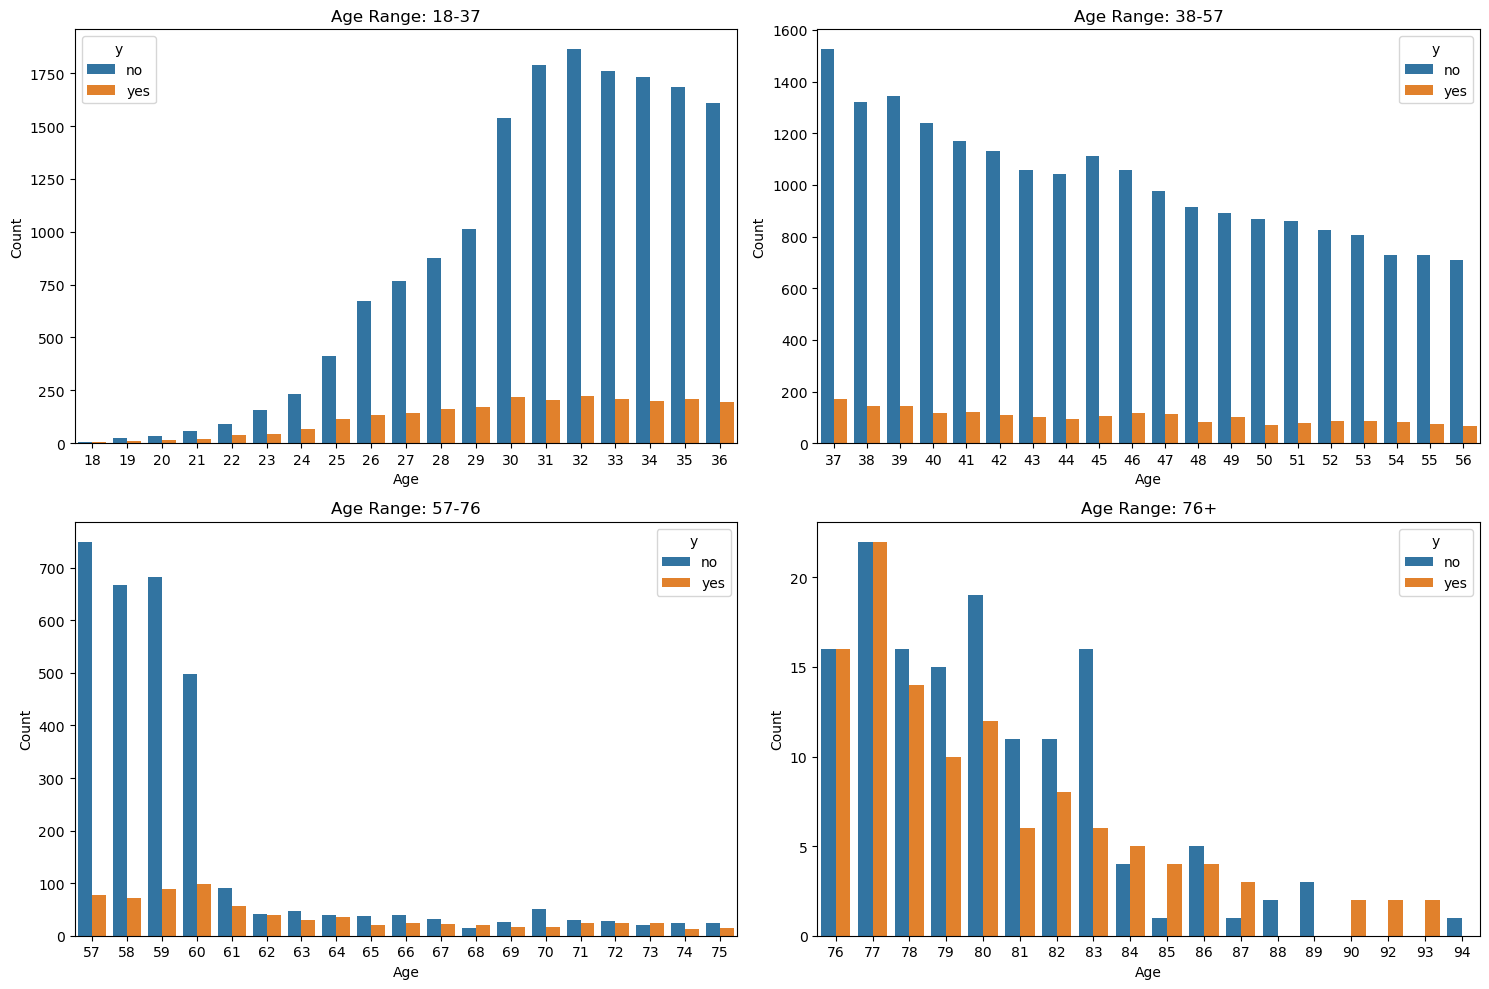

In [27]:
# Create age bins with explicit ordering
age_labels = ["18-37", "38-57", "57-76", "76+"]
df['age_bins'] = pd.cut(df['age'], bins=[18, 37, 57, 76, df['age'].max()], labels=age_labels, right=False)

# Convert age_bins to categorical with explicit ordering
df['age_bins'] = pd.Categorical(df['age_bins'], categories=age_labels, ordered=True)

# Create separate count plots for each bin, sorted by age bins
plt.figure(figsize=(15, 10))

for i, age_range in enumerate(age_labels):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x="age", hue="y", data=df[df['age_bins'] == age_range])
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.title(f"Age Range: {age_range}")

plt.tight_layout()
plt.show()

In [31]:
df.nunique()

age              77
job              11
marital           3
education         3
default           2
balance        7168
housing           2
loan              2
contact           2
day_of_week      31
month            12
duration       1573
campaign         48
pdays           559
previous         41
poutcome          3
y                 2
age_bins          4
dtype: int64

In [32]:
look_columns = ["job", "marital", "education","default", "housing", "loan", "contact", "month", "poutcome"]

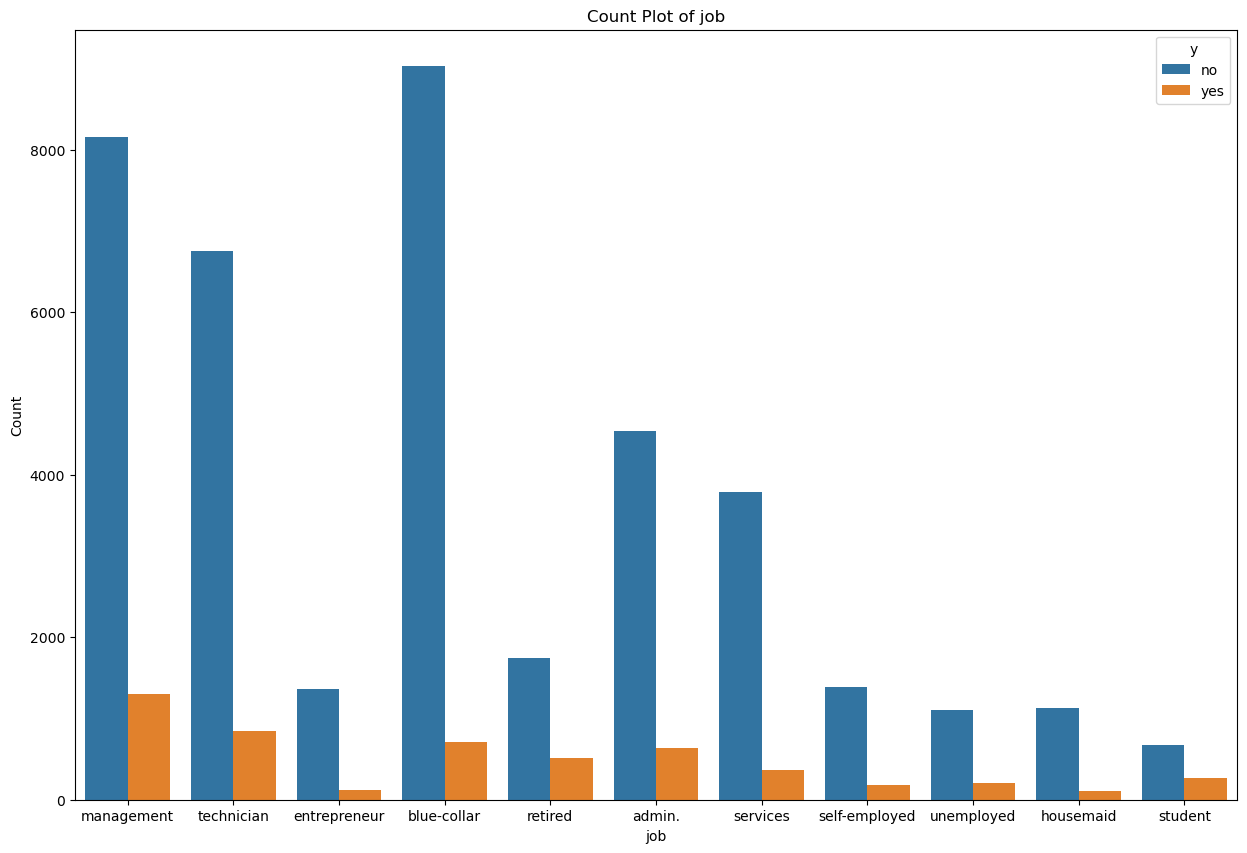

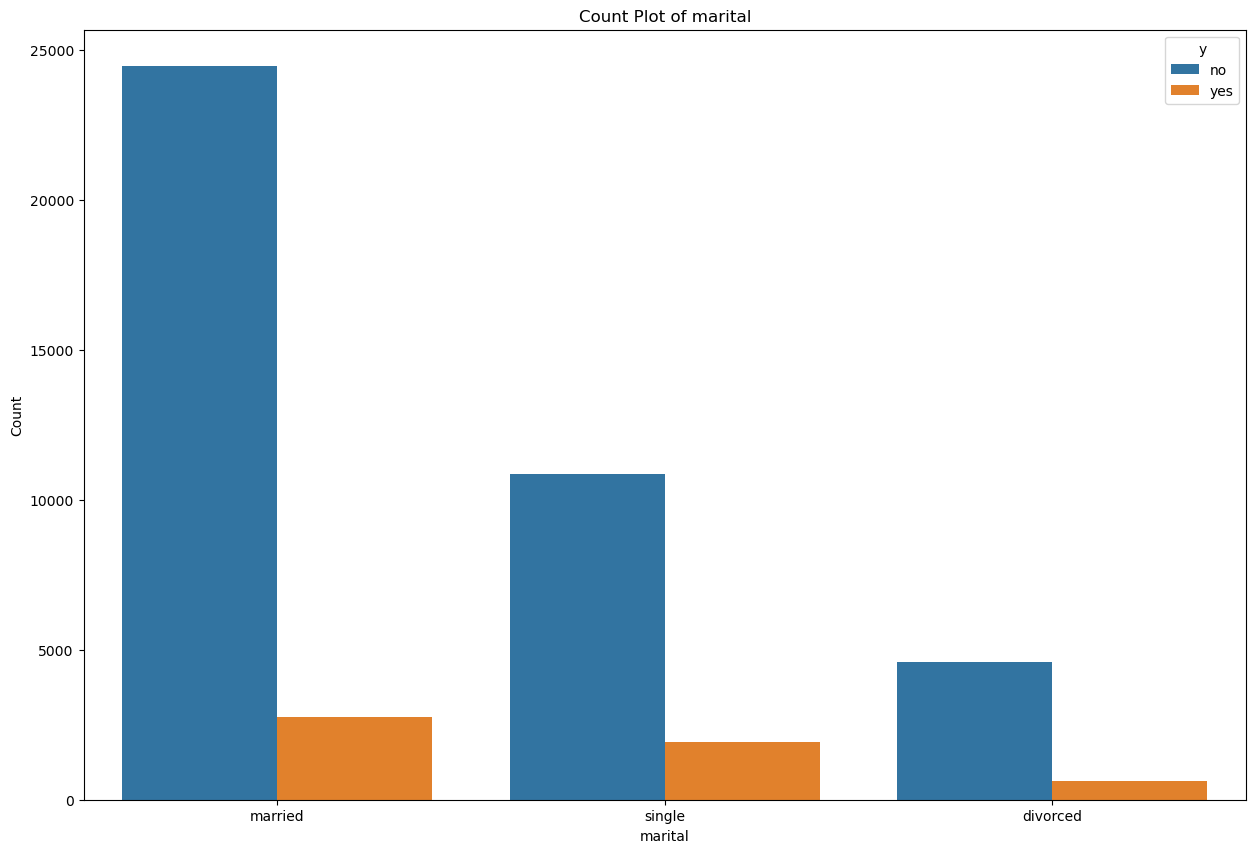

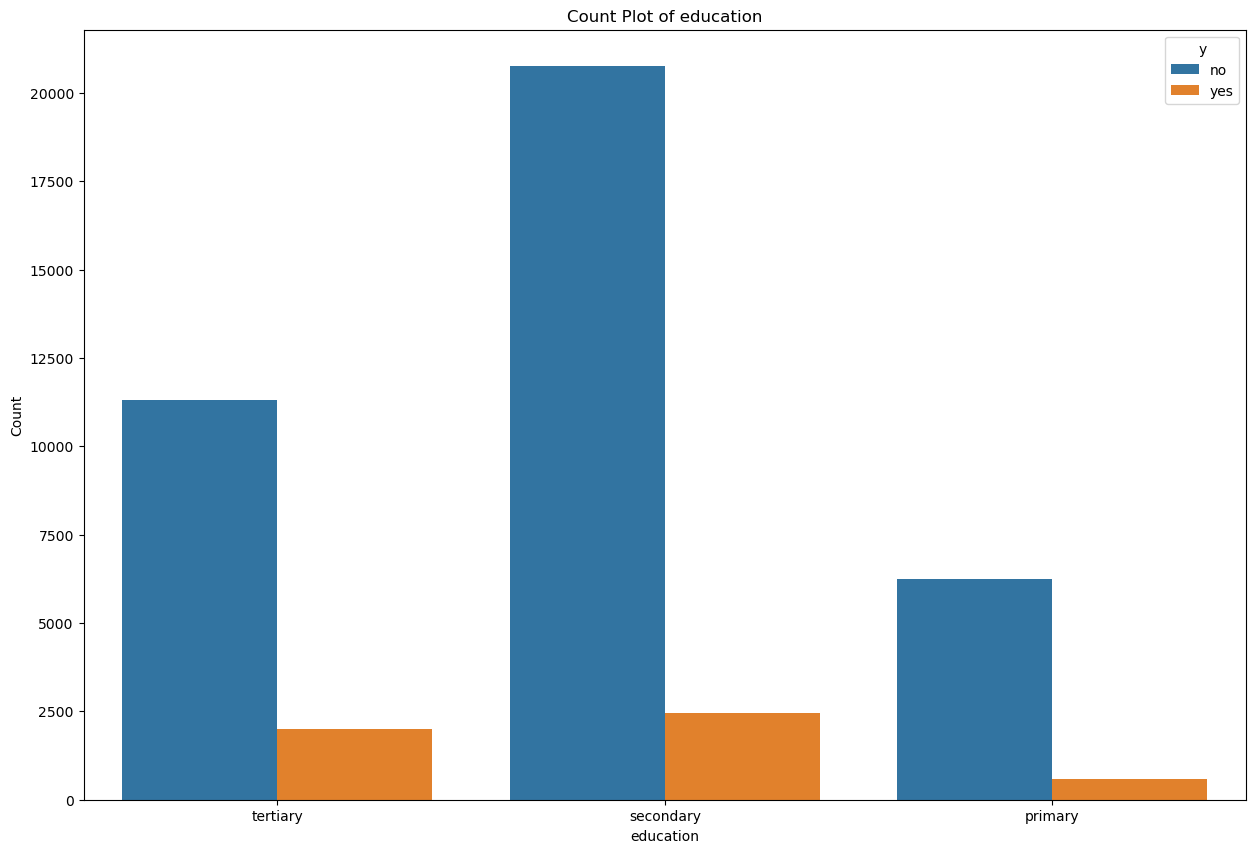

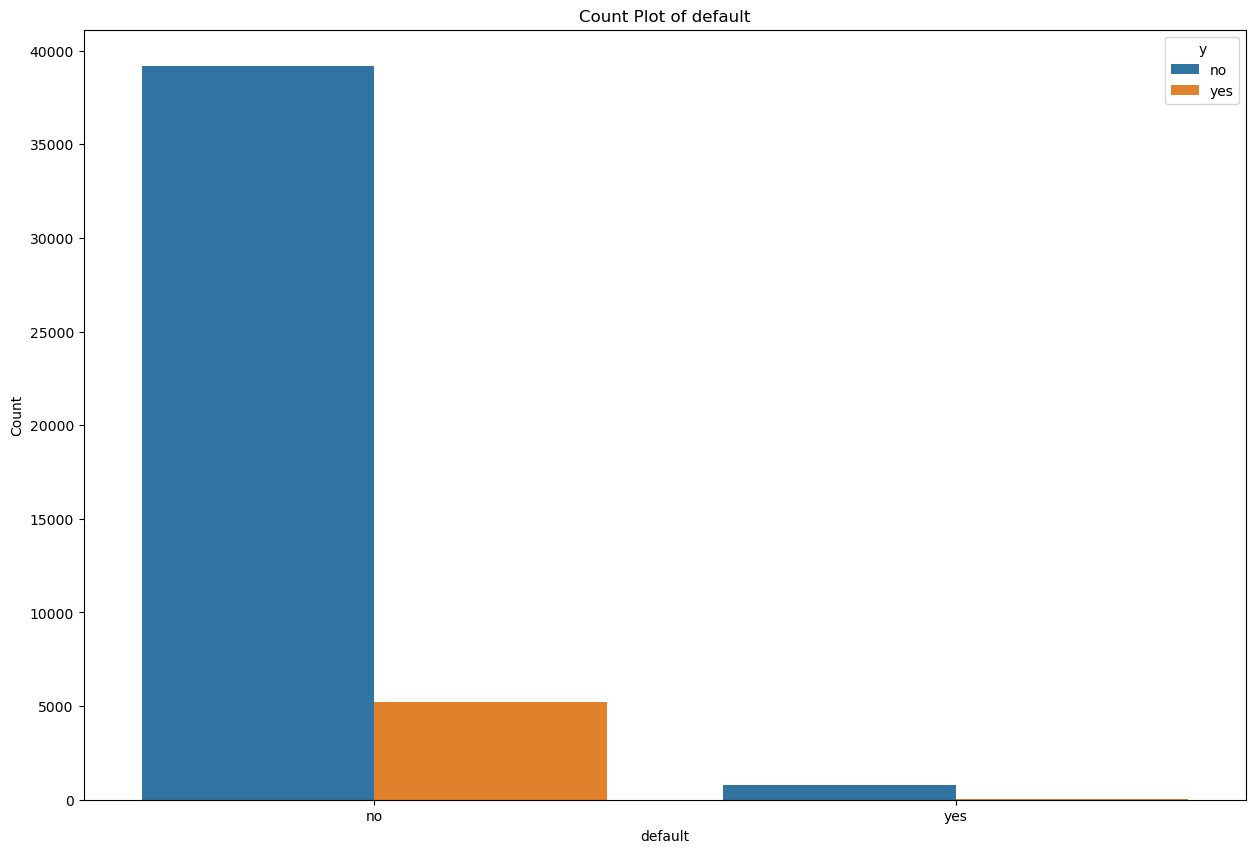

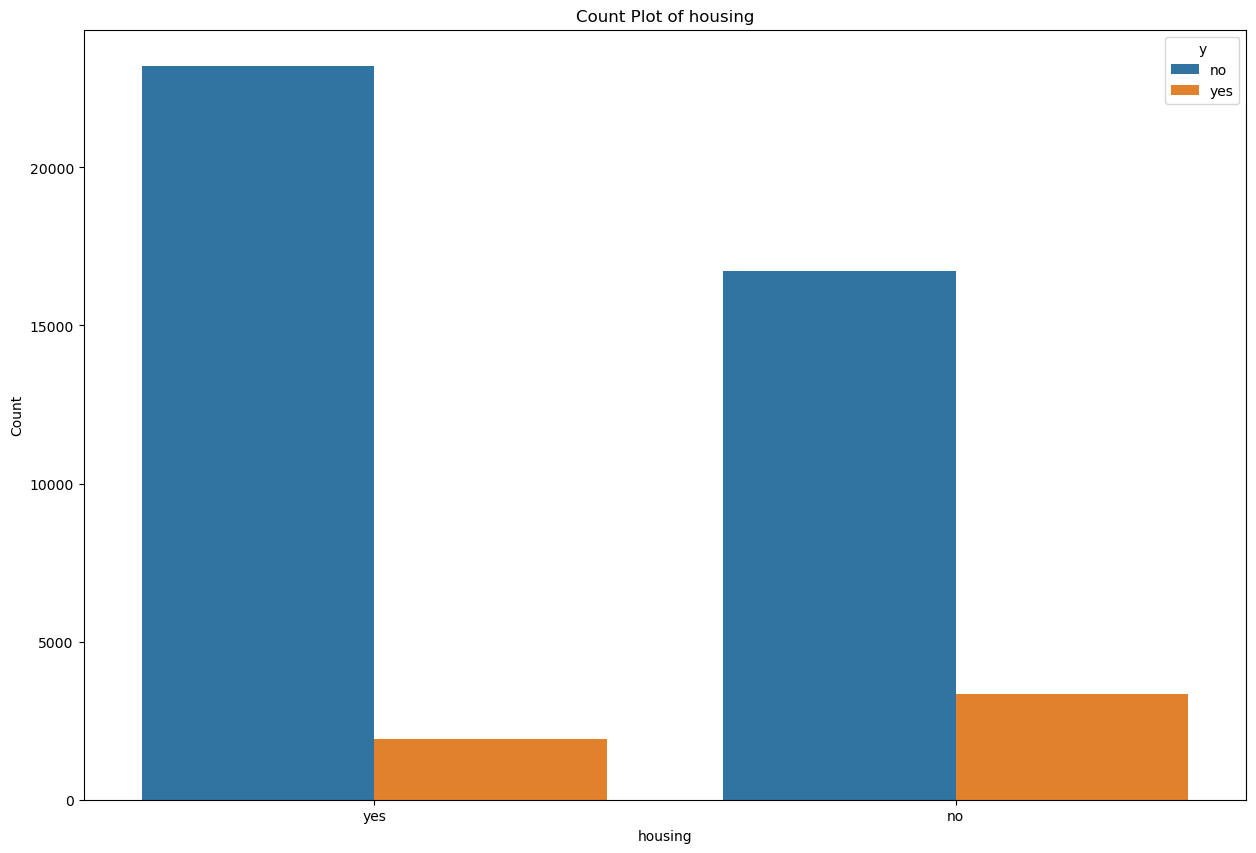

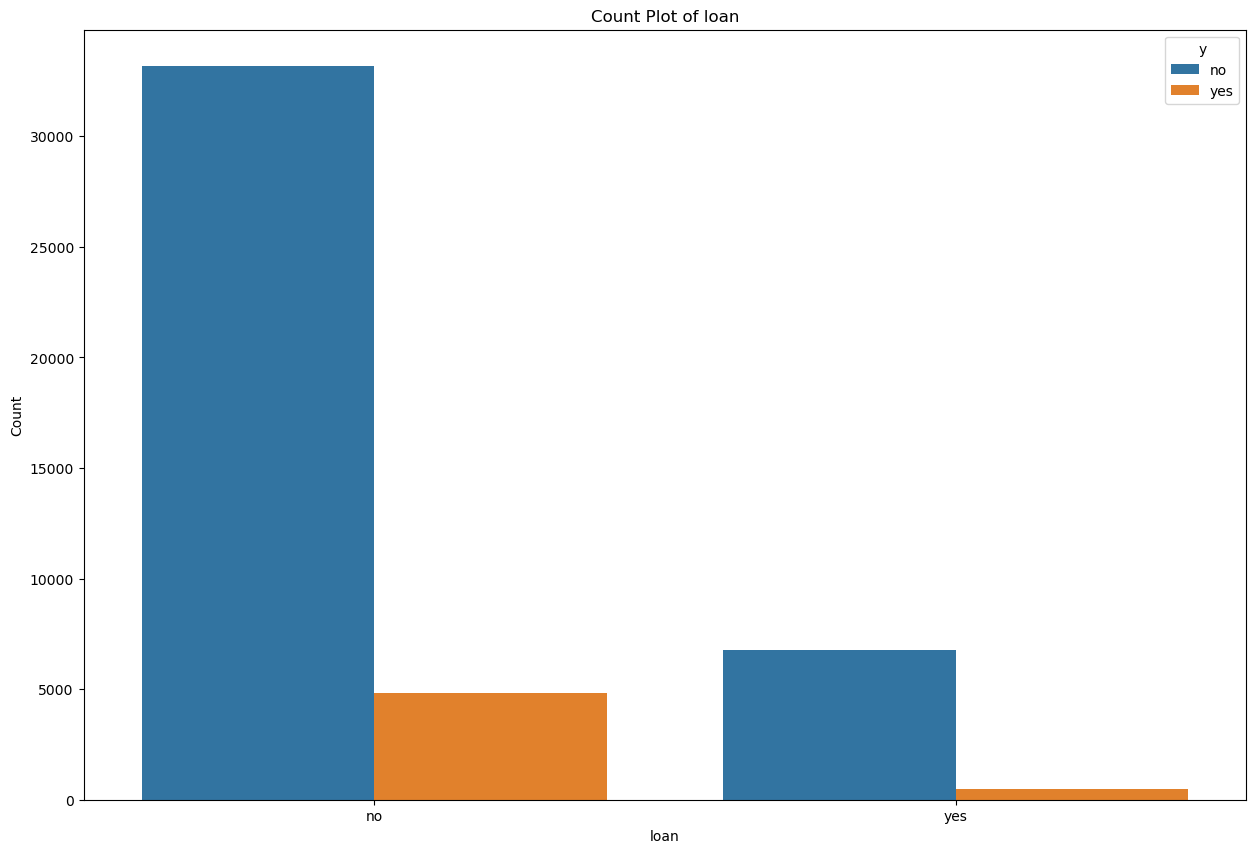

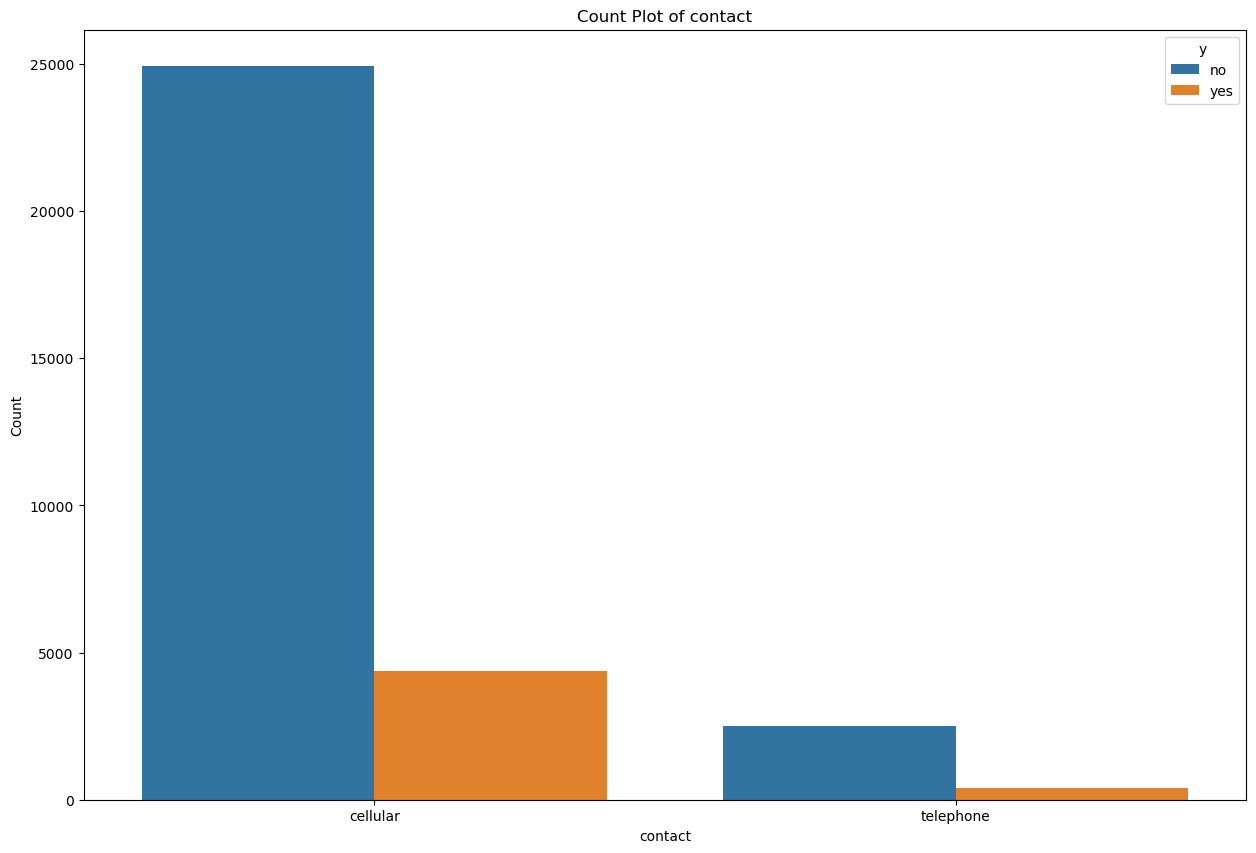

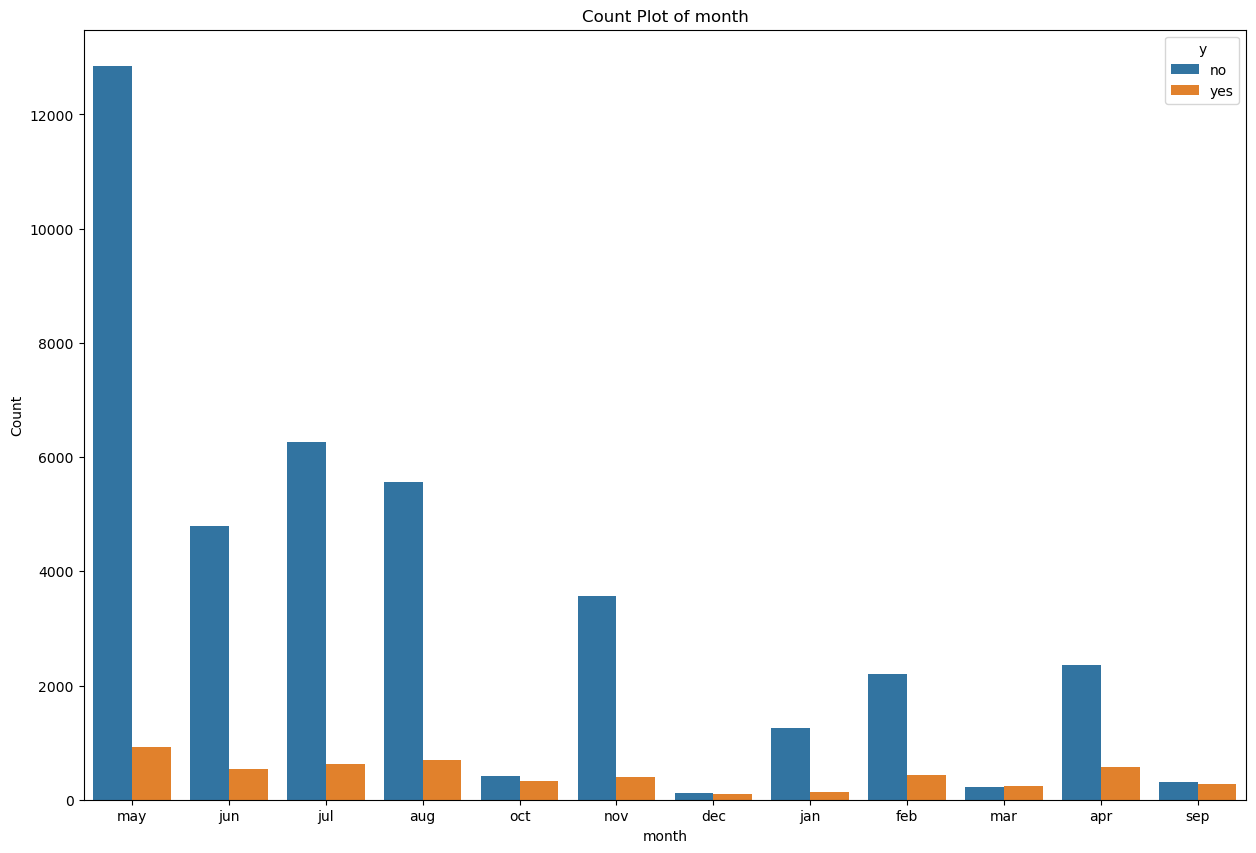

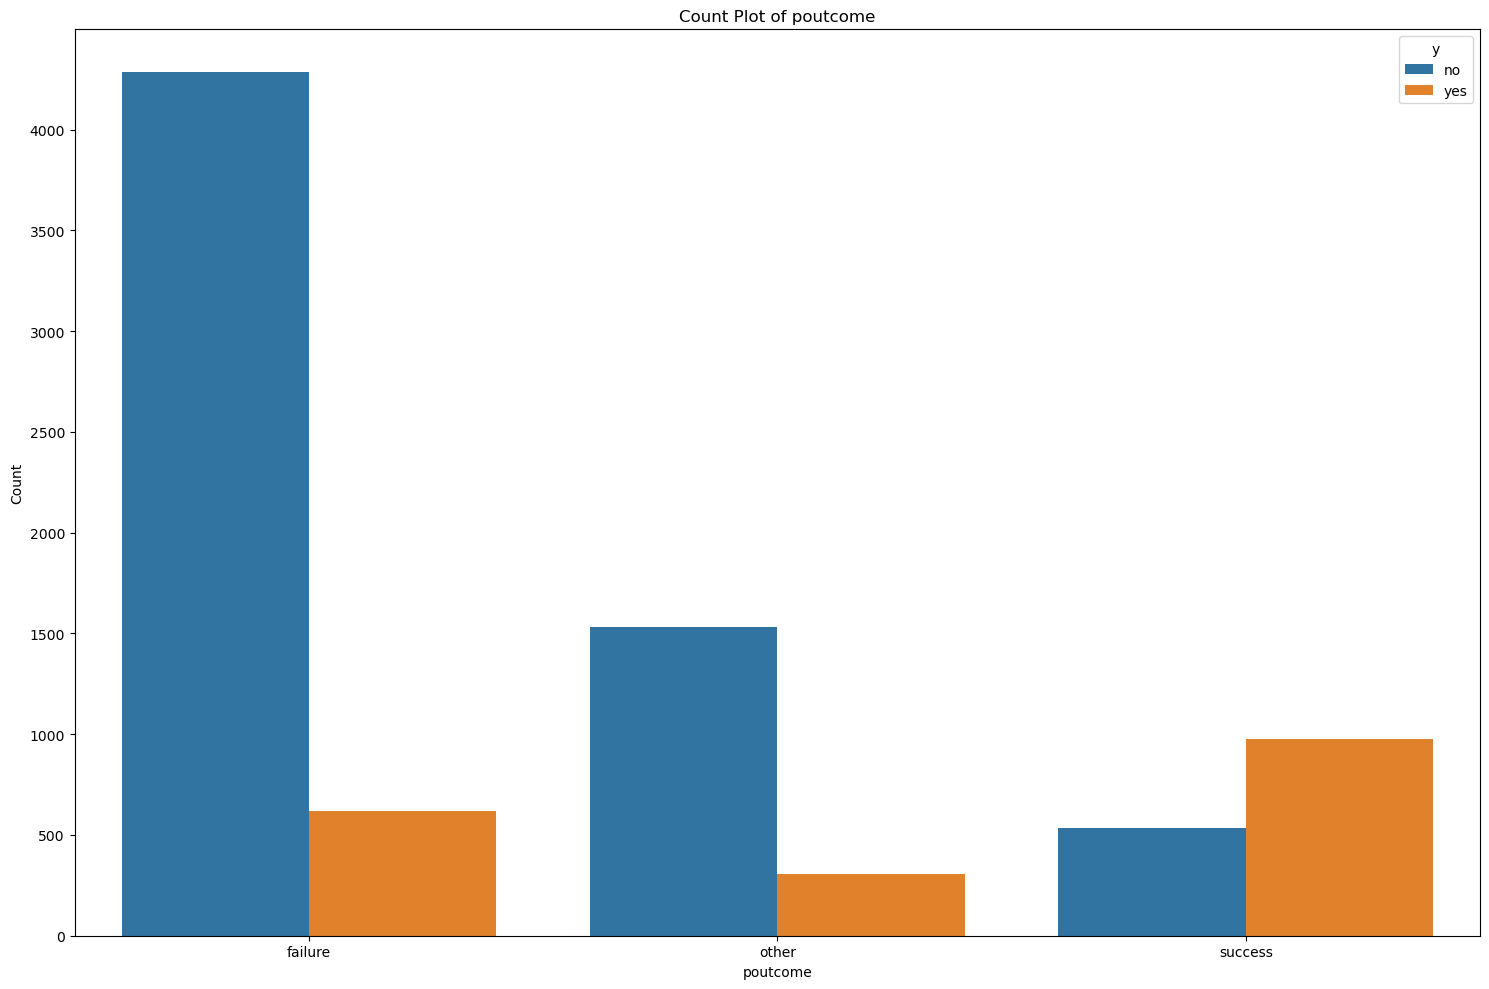

In [33]:
for col in look_columns:
    plt.figure(figsize=(15, 10))
    sns.countplot(x=col, hue="y", data=df)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Count Plot of {col}")

plt.tight_layout()
plt.show()

### Because using directly count plot won't tell us whole story and does not give how probabilities of yes and no distributed, we need to use something else.

In [114]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [38]:
df.groupby("contact")["y"].mean()

contact
cellular     0.149189
telephone    0.134205
Name: y, dtype: float64

In [43]:
probabilities = df.groupby("age")["y"].mean().reset_index()

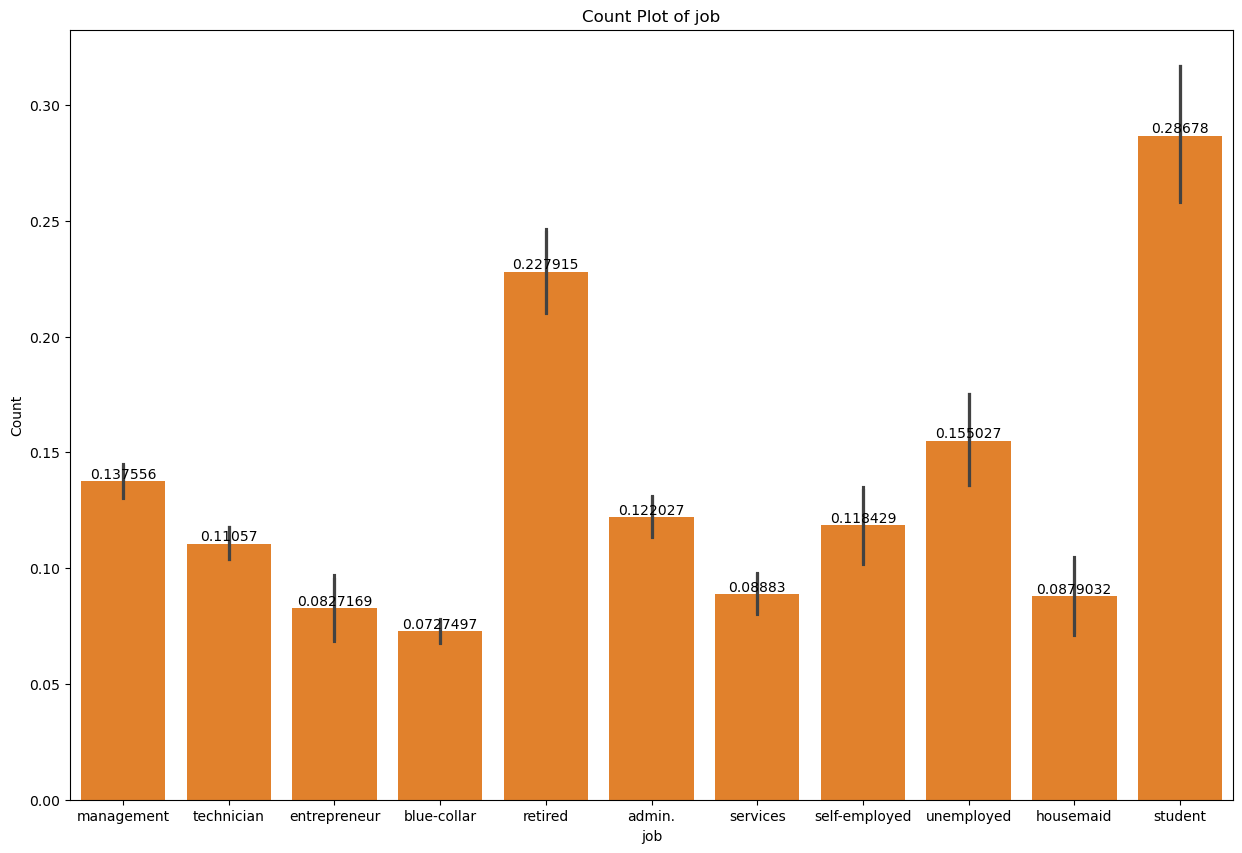

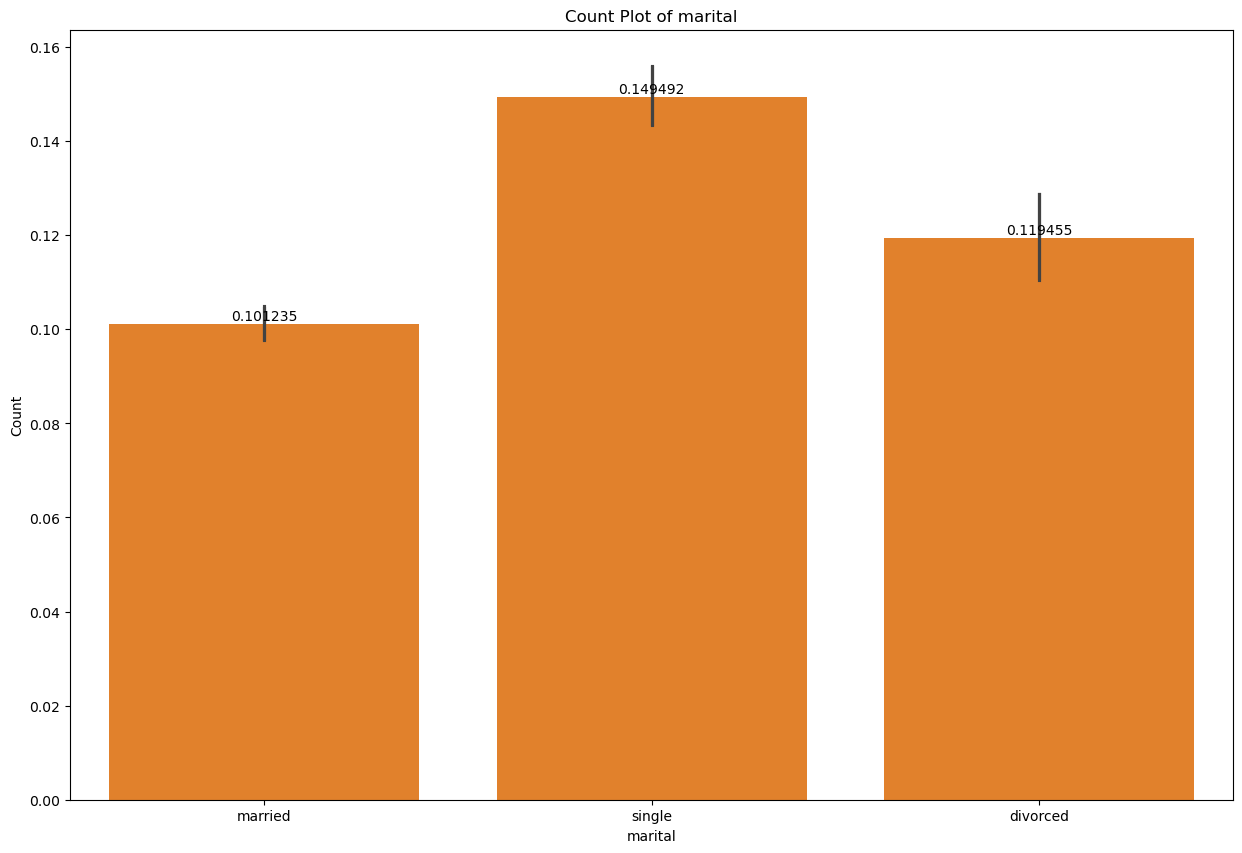

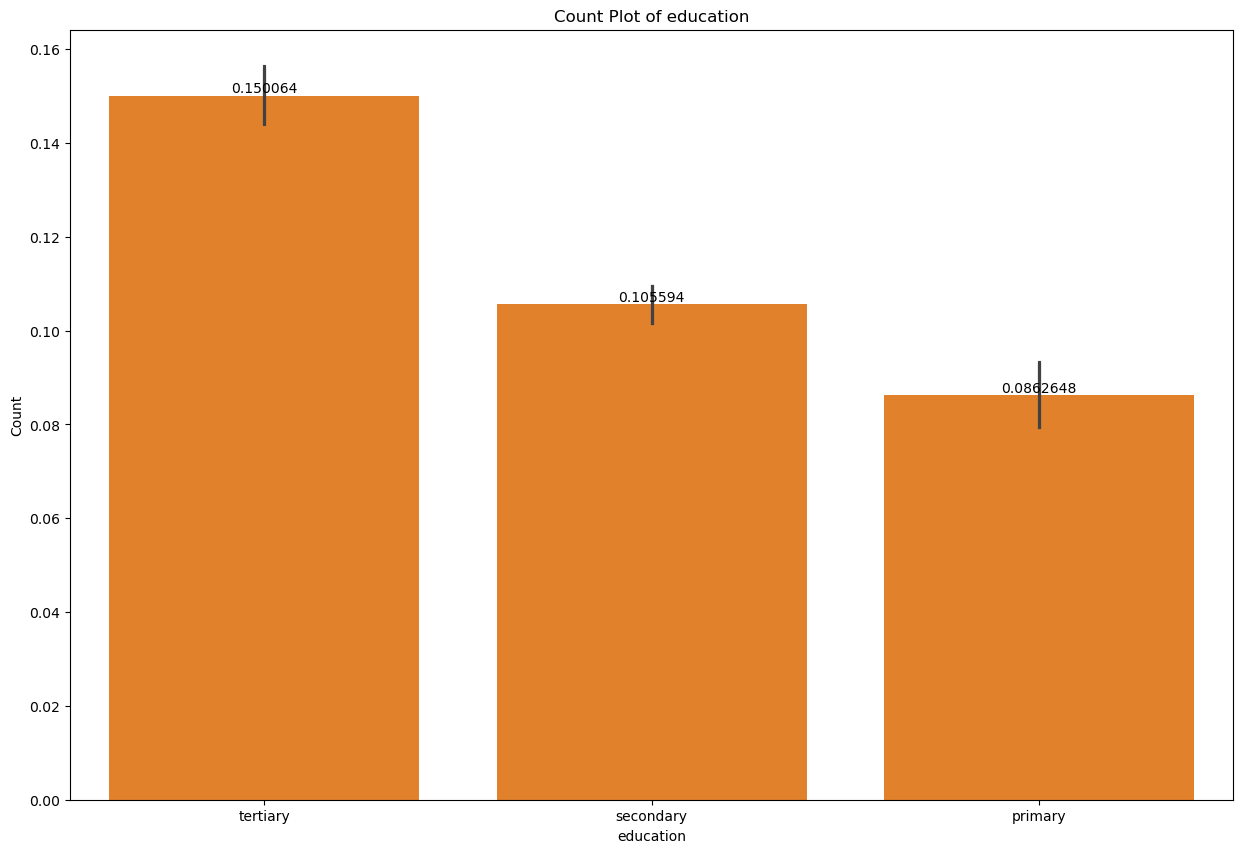

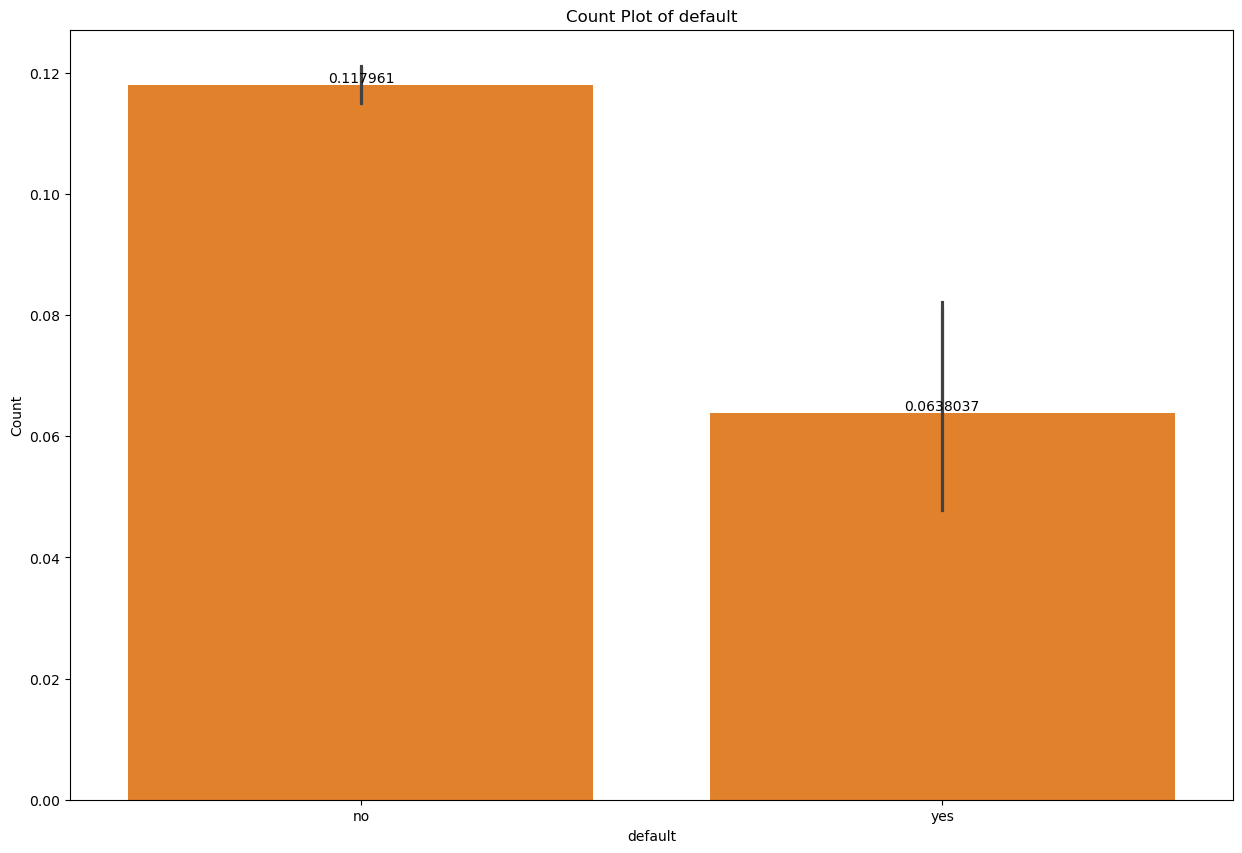

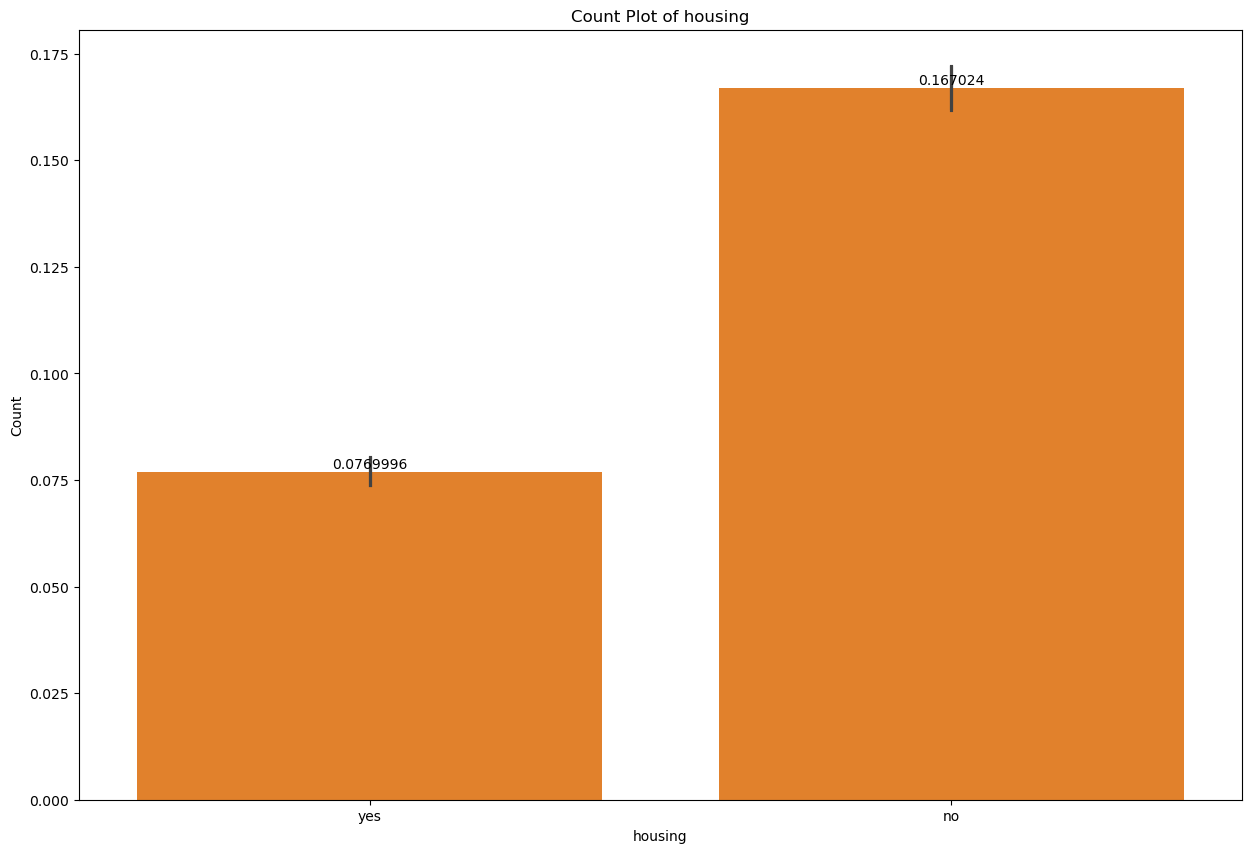

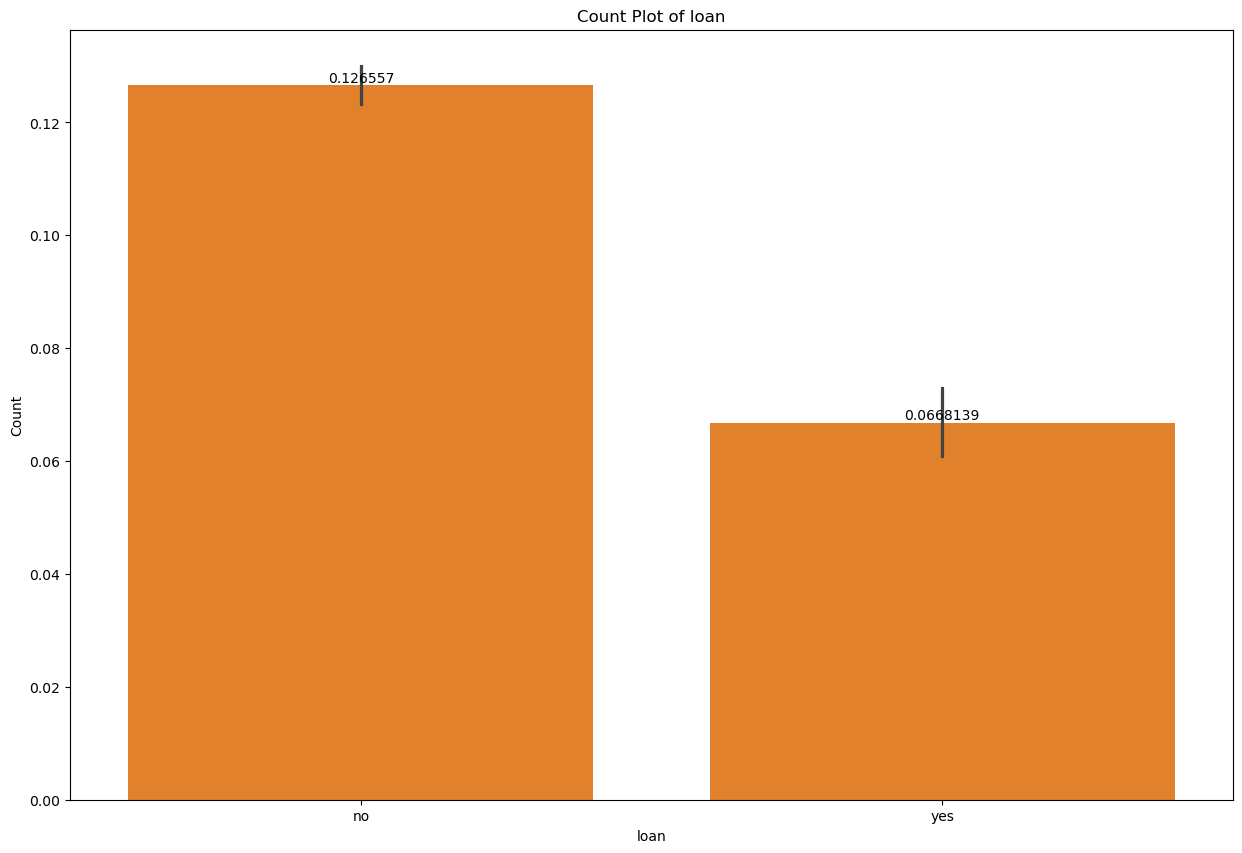

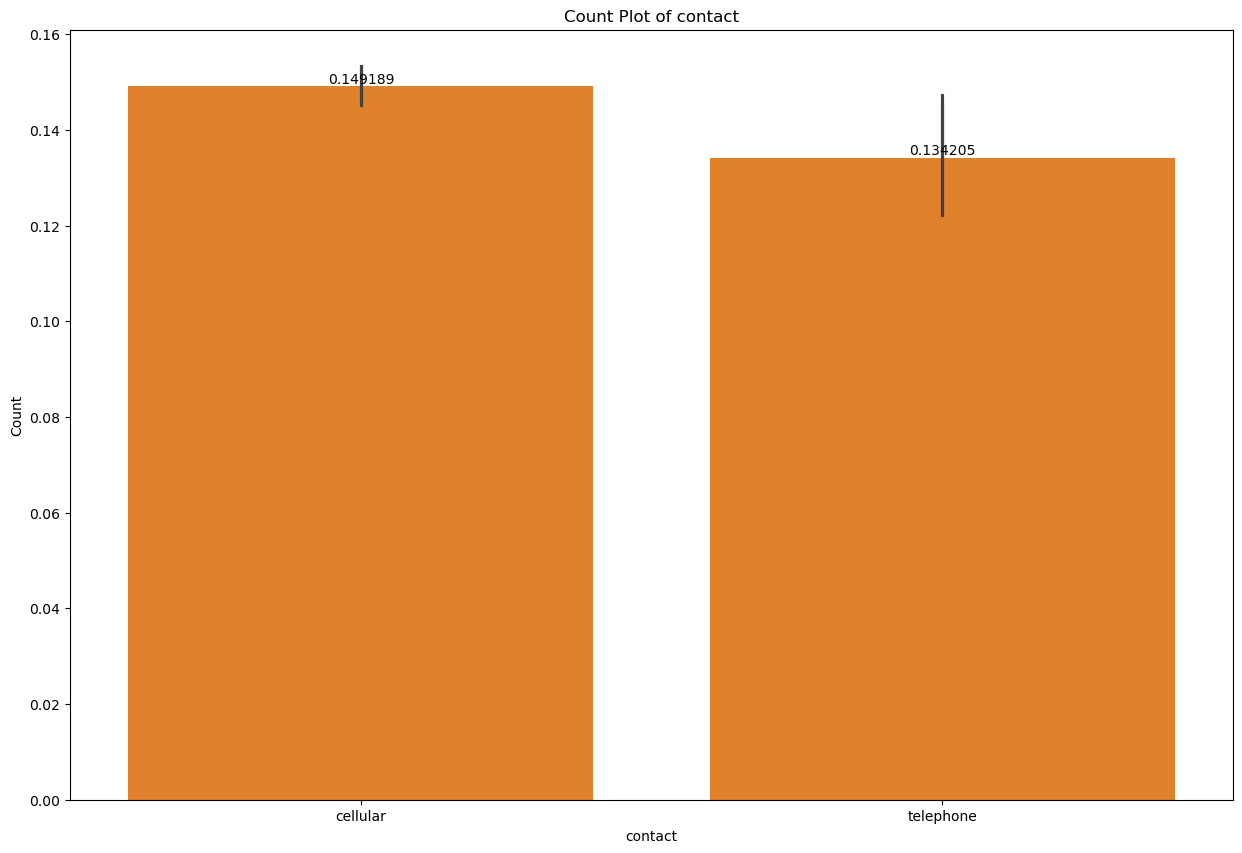

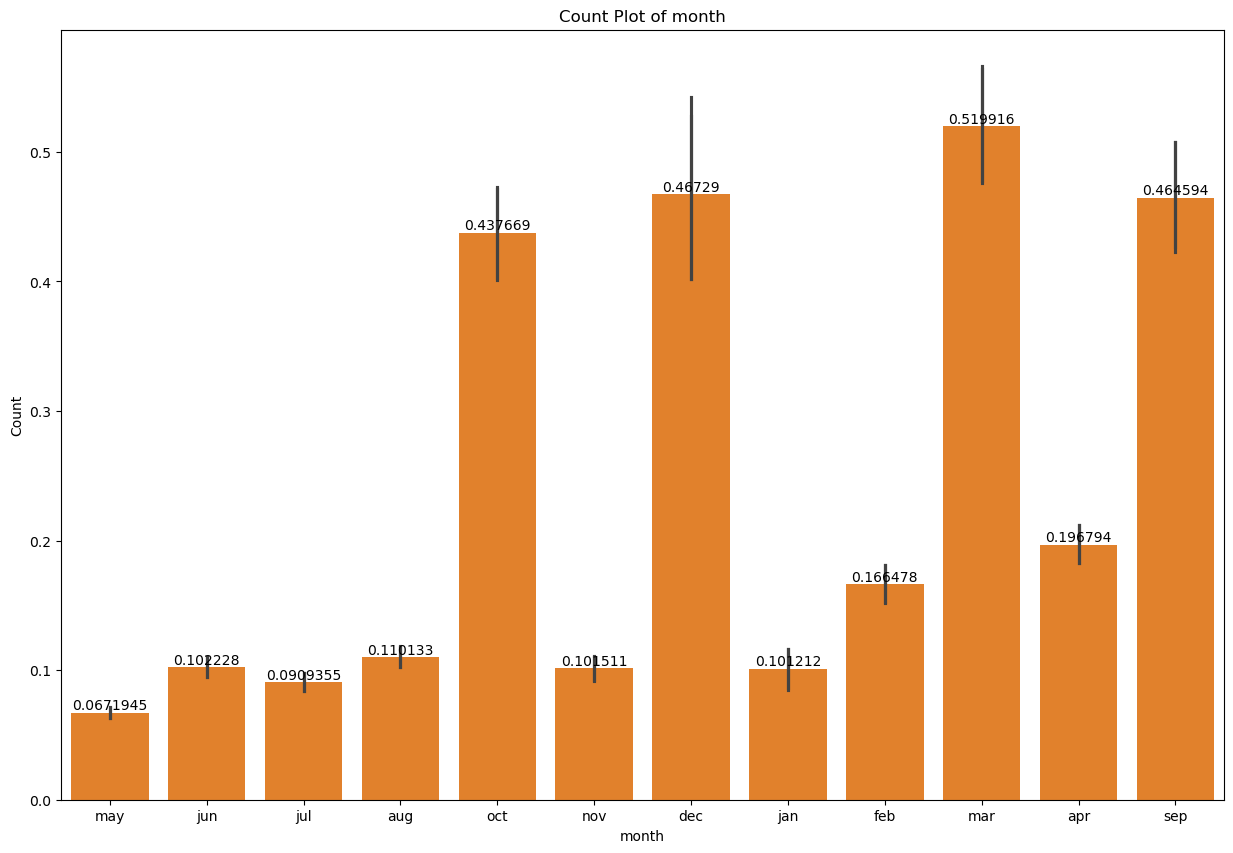

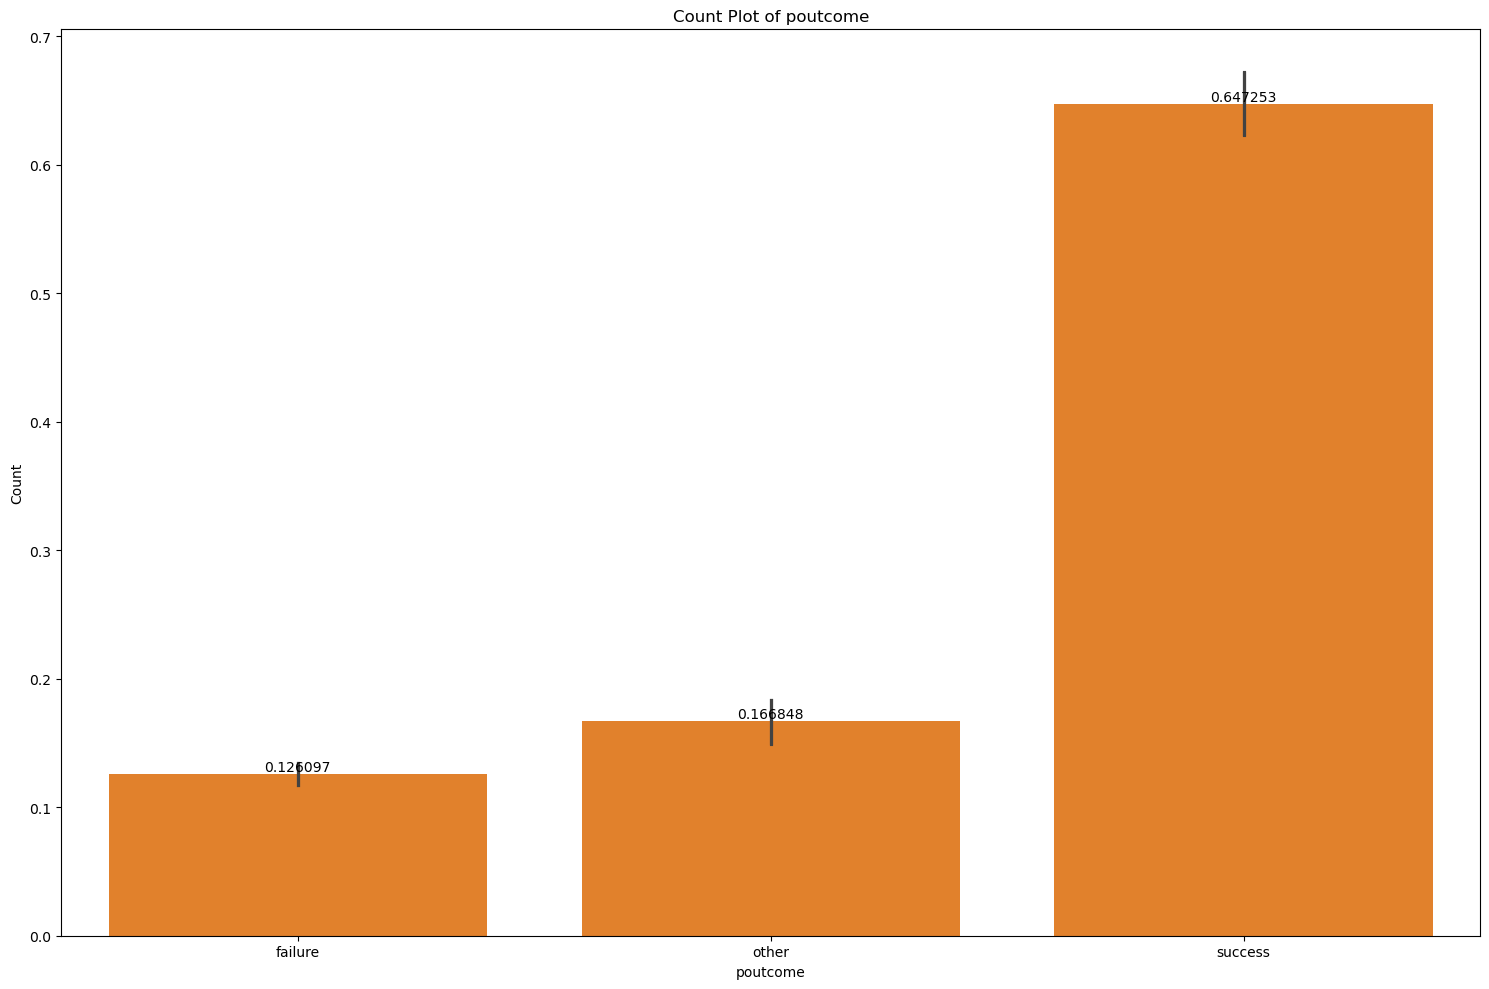

In [50]:
for col in look_columns:
    plt.figure(figsize=(15, 10))
    ax = sns.barplot(x=col,y="y" ,data=df)
    for p in ax.containers:
        ax.bar_label(p)
    sns.barplot(x=col, y="y", data=df)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Count Plot of {col}")

plt.tight_layout()
plt.show()

Now we can see that some values in some columns, i.e. different job title, different month of year affects the outcome significantly. 

In [36]:
df.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
age_bins           2
dtype: int64

Normally, poutcome (outcome of previous marketing campaign) has large number of null values, which can be dropped. However, users that success from previous campaign will likely to get this campaign as well. So we assign missing values with unknown.

The contact column has little effect on output. So we can drop that column entirely.

For job and education, we can fill this values with most occured (mode) value.

In [53]:
df["job"].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64

Because of distribution of job very even at top level, we can rows that contain null value for job.

In [89]:
df = df.dropna(subset=["job"])

In [90]:
df.isnull().sum()

age                0
job                0
marital            0
education       1730
default            0
balance            0
housing            0
loan               0
contact        12909
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36704
y                  0
dtype: int64

In [91]:
df["education"].value_counts()

education
secondary    23131
tertiary     13262
primary       6800
Name: count, dtype: int64

We can fill the education column with most occured value, which is secondary in this case.

In [92]:
most_occuring_education = df["education"].mode()[0]

In [93]:
most_occuring_education

'secondary'

In [94]:
df = df.fillna({"education": most_occuring_education})

In [95]:
df.isnull().sum()   

age                0
job                0
marital            0
education          0
default            0
balance            0
housing            0
loan               0
contact        12909
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36704
y                  0
dtype: int64

We can drop contact column.

In [96]:
df = df.drop("contact", axis=1)

In [ ]:
df = df.drop("age_bins", axis=1)

In [97]:
df["poutcome"].value_counts()

poutcome
failure    4881
other      1838
success    1500
Name: count, dtype: int64

In [98]:
df = df.fillna({"poutcome": "other"})

In [99]:
df["poutcome"].value_counts()

poutcome
other      38542
failure     4881
success     1500
Name: count, dtype: int64

We need to encode other with 0, failure with -1 and success with 1.

## Encoding dataset.

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44923 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          44923 non-null  int64 
 1   job          44923 non-null  object
 2   marital      44923 non-null  object
 3   education    44923 non-null  object
 4   default      44923 non-null  object
 5   balance      44923 non-null  int64 
 6   housing      44923 non-null  object
 7   loan         44923 non-null  object
 8   day_of_week  44923 non-null  int64 
 9   month        44923 non-null  object
 10  duration     44923 non-null  int64 
 11  campaign     44923 non-null  int64 
 12  pdays        44923 non-null  int64 
 13  previous     44923 non-null  int64 
 14  poutcome     44923 non-null  object
 15  y            44923 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.8+ MB


In [101]:
df.nunique()

age              77
job              11
marital           3
education         3
default           2
balance        7142
housing           2
loan              2
day_of_week      31
month            12
duration       1571
campaign         48
pdays           558
previous         41
poutcome          3
y                 2
dtype: int64

- 1   job          44923 non-null  object  
- 2   marital      44923 non-null  object  
- 3   education    44923 non-null  object  
- 4   default      44923 non-null  object
- 6   housing      44923 non-null  object  
- 7   loan         44923 non-null  object 
- 9   month        44923 non-null  object
- 14  poutcome     44923 non-null  object

This columns should be encoded. Job, marital, education, default, housing, and loan will be encoded by using one-hot encoding. Poutcome will be encoded like told in previous, and month will be ordinal encoded.

In [102]:
to_be_one_hot_encoded = ["job", "marital", "education", "default", "housing", "loan"]

In [103]:
poutcome_map = {"other": 0, "failure": -1, "success": 1}

In [104]:
month_map = {
    "jan": 1,
    "feb": 2,
    "mar": 3, 
    "apr": 4, 
    "may": 5, 
    "jun": 6, 
    "jul": 7, 
    "aug": 8, 
    "sep": 9, 
    "oct": 10, 
    "nov": 11, 
    "dec": 12}

In [105]:
one_hot_encoded = pd.get_dummies(df[to_be_one_hot_encoded], dtype=int)

In [106]:
one_hot_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44923 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   job_admin.           44923 non-null  int32
 1   job_blue-collar      44923 non-null  int32
 2   job_entrepreneur     44923 non-null  int32
 3   job_housemaid        44923 non-null  int32
 4   job_management       44923 non-null  int32
 5   job_retired          44923 non-null  int32
 6   job_self-employed    44923 non-null  int32
 7   job_services         44923 non-null  int32
 8   job_student          44923 non-null  int32
 9   job_technician       44923 non-null  int32
 10  job_unemployed       44923 non-null  int32
 11  marital_divorced     44923 non-null  int32
 12  marital_married      44923 non-null  int32
 13  marital_single       44923 non-null  int32
 14  education_primary    44923 non-null  int32
 15  education_secondary  44923 non-null  int32
 16  education_tertiary   44923 

In [107]:
checkpoint = df.copy()

In [108]:
df = df.drop(to_be_one_hot_encoded, axis=1)

In [109]:
df = pd.concat([df, one_hot_encoded], axis=1)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44923 entries, 0 to 45210
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  44923 non-null  int64 
 1   balance              44923 non-null  int64 
 2   day_of_week          44923 non-null  int64 
 3   month                44923 non-null  object
 4   duration             44923 non-null  int64 
 5   campaign             44923 non-null  int64 
 6   pdays                44923 non-null  int64 
 7   previous             44923 non-null  int64 
 8   poutcome             44923 non-null  object
 9   y                    44923 non-null  object
 10  job_admin.           44923 non-null  int32 
 11  job_blue-collar      44923 non-null  int32 
 12  job_entrepreneur     44923 non-null  int32 
 13  job_housemaid        44923 non-null  int32 
 14  job_management       44923 non-null  int32 
 15  job_retired          44923 non-null  int32 
 16  job_self-

In [111]:
df["poutcome"] = df["poutcome"].map(poutcome_map)

In [112]:
df["month"] = df["month"].map(month_map)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44923 entries, 0 to 45210
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  44923 non-null  int64
 1   balance              44923 non-null  int64
 2   day_of_week          44923 non-null  int64
 3   month                44923 non-null  int64
 4   duration             44923 non-null  int64
 5   campaign             44923 non-null  int64
 6   pdays                44923 non-null  int64
 7   previous             44923 non-null  int64
 8   poutcome             44923 non-null  int64
 9   y                    44923 non-null  int64
 10  job_admin.           44923 non-null  int32
 11  job_blue-collar      44923 non-null  int32
 12  job_entrepreneur     44923 non-null  int32
 13  job_housemaid        44923 non-null  int32
 14  job_management       44923 non-null  int32
 15  job_retired          44923 non-null  int32
 16  job_self-employed    44923 

Now our dataset, cleanaed, encoded and ready to work with.

To use it later, we can save it by using pandas.save() function.

In [116]:
df.to_csv("bank_dataset_cleaned.csv", index=False)